Vamos a realizar una clasterización siguiendo una serie de pasos:
1.• Aprendizaje No-Supervisado en Python
2.• Ingeniería de variables (Feature engineering)
3.• Centroid-based Clustering (K-Means , Mean-Shift & Mini-Batch K-Means)
4.• Density-based clustering (DBSCAN, OPTICS)
5.• Distribution-based clustering (GMM)
6.• Hierarchical clustering (Agglomerative Clustering)

Vamos a empezar sacando todos los datos de un valor significativo y vamos a realizarle una limpieza 
y una Feature engineering, que viene a ser la transformacion de los datos a la variable que le corresponda,
por ejemplo, una fecha habria que pasarla a "datetime".
Los datos ya limpios los tenemos en el siguiente csv

In [101]:
#Librerias necesarias
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [96]:
csv_file = 'CSVS STATS/todas_stats.csv'  

# Leer el archivo CSV en un DataFrame
estadisticas = pd.read_csv(csv_file)

# Pasar a data frame
df = pd.DataFrame(estadisticas)

df.head()

,equipo,victorias_esta_temp,empates_esta_temp,derrotas_esta_temp,porcentaje_victorias_esta_temp,porcentaje_empates_esta_temp,porcentaje_derrotas_esta_temp,victorias_ult10_temp,empates_ult10_temp,derrotas_ult10_temp,...,Goles Marcados Local_ult10_temp,Goles Marcados Visitante_ult10_temp,Goles Recibidos Local_ult10_temp,Goles Recibidos Visitante_ult10_temp,Golesxpartido Local_ult10_temp,Golesxpartido Visitante_ult10_temp,Golesxpartido Recibidos Local_ult10_temp,Golesxpartido Recibidos Visitante_ult10_temp,titulos_UCL_ganados,titulos_UCL_ult10_temp
0,Copenhague,2.0,2.0,2.0,33.3,33.3,33.3,2.0,2.0,2.0,...,6.0,2.0,5.0,3.0,2.0,0.7,1.7,1.0,0,0
1,Leipzig,4.0,0.0,2.0,66.7,0.0,33.3,22.0,5.0,19.0,...,44.0,37.0,37.0,48.0,1.8,1.7,1.5,2.2,0,0
2,PSG,2.0,2.0,2.0,33.3,33.3,33.3,30.0,8.0,16.0,...,65.0,56.0,20.0,40.0,2.4,2.1,0.7,1.5,0,0
3,Lazio,3.0,1.0,2.0,50.0,16.7,33.3,5.0,5.0,4.0,...,13.0,7.0,9.0,11.0,1.9,1.0,1.3,1.6,0,0
4,PSV,2.0,3.0,1.0,33.3,50.0,16.7,2.0,3.0,1.0,...,4.0,4.0,3.0,7.0,1.3,1.3,1.0,2.3,0,0


Ahora vamos a realizar una clusterizacion haciendo uso de un Aprendizaje No-Supervisado

In [97]:
#Vamos a añadir una columna con la cantidad de partidos jugados los ultimos 10 años

df['partidos_ult10_temp'] = df['victorias_ult10_temp'] + df['empates_ult10_temp'] + df['derrotas_ult10_temp']

df.head()

,equipo,victorias_esta_temp,empates_esta_temp,derrotas_esta_temp,porcentaje_victorias_esta_temp,porcentaje_empates_esta_temp,porcentaje_derrotas_esta_temp,victorias_ult10_temp,empates_ult10_temp,derrotas_ult10_temp,...,Goles Marcados Visitante_ult10_temp,Goles Recibidos Local_ult10_temp,Goles Recibidos Visitante_ult10_temp,Golesxpartido Local_ult10_temp,Golesxpartido Visitante_ult10_temp,Golesxpartido Recibidos Local_ult10_temp,Golesxpartido Recibidos Visitante_ult10_temp,titulos_UCL_ganados,titulos_UCL_ult10_temp,partidos_ult10_temp
0,Copenhague,2.0,2.0,2.0,33.3,33.3,33.3,2.0,2.0,2.0,...,2.0,5.0,3.0,2.0,0.7,1.7,1.0,0,0,6.0
1,Leipzig,4.0,0.0,2.0,66.7,0.0,33.3,22.0,5.0,19.0,...,37.0,37.0,48.0,1.8,1.7,1.5,2.2,0,0,46.0
2,PSG,2.0,2.0,2.0,33.3,33.3,33.3,30.0,8.0,16.0,...,56.0,20.0,40.0,2.4,2.1,0.7,1.5,0,0,54.0
3,Lazio,3.0,1.0,2.0,50.0,16.7,33.3,5.0,5.0,4.0,...,7.0,9.0,11.0,1.9,1.0,1.3,1.6,0,0,14.0
4,PSV,2.0,3.0,1.0,33.3,50.0,16.7,2.0,3.0,1.0,...,4.0,3.0,7.0,1.3,1.3,1.0,2.3,0,0,6.0


Vamos a realizar un clustering por K-Means realizando previamente una normalizacion de las variables que he elegido

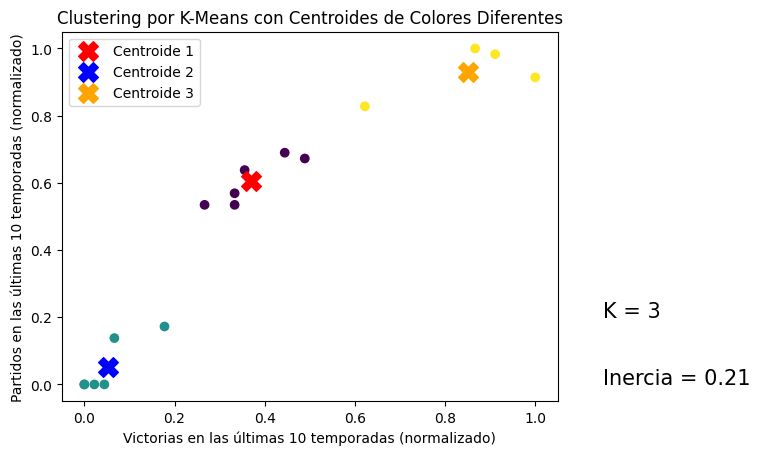

In [34]:
# Seleccionar las columnas relevantes
columnas_para_normalizar = ['victorias_ult10_temp', 'partidos_ult10_temp']

# Crear un objeto MinMaxScaler para evitar sesgos
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
df[columnas_para_normalizar] = scaler.fit_transform(df[columnas_para_normalizar])

# Definir el número de clústeres
num_clusters = 3

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['etiqueta_clusters'] = kmeans.fit_predict(df[columnas_para_normalizar])

# Colores para los centroides
colores = ["red", "blue", "orange"]

# Visualizar los resultados con colores diferentes para cada clúster y cada centroide
plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['etiqueta_clusters'], cmap='viridis')
for i, color in enumerate(colores):
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='X', s=200, color=color, label=f'Centroide {i+1}')

plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.title('Clustering por K-Means con Centroides de Colores Diferentes')
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=15)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=15)
plt.legend()
plt.show()

Como podemos observar, cada punto es un equipo y tiene un centroide que se adapta mas a ese equipo que el resto de centroides,
la inercia muestra que tan pegados al centroide estan los datos, si aumentamos k, es decir el numero de centroides, esa inercia disminuira y por el contrario, si disminuimos k, la inercia aumentara

Vamos a realizar un Clustering de Mean-Shift que a diferencia de K-means, es un algoritmo de agrupamiento basado en densidad que encuentra los modos locales de densidad en los datos y agrupa los puntos alrededor de esos modos.
Comienza con ventanas (kernel) centradas en cada punto de datos y desplaza iterativamente estas ventanas hacia las regiones de mayor densidad hasta que convergen hacia los modos locales de densidad.
No requiere especificar el número de clusters de antemano; lo determina automáticamente en función de la densidad de los datos y es menos sensible a la inicialización debido a su enfoque basado en densidad.


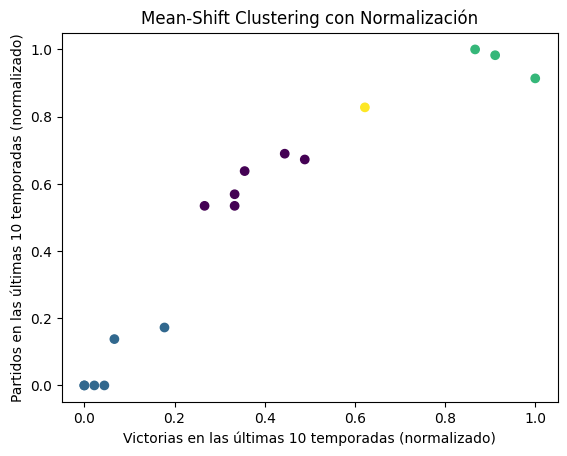

In [41]:
# Aplicar Mean-Shift
meanshift = MeanShift()
df['etiqueta_clusters'] = meanshift.fit_predict(df[columnas_para_normalizar])


# Visualizar los resultados con colores diferentes para cada clúster
plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['etiqueta_clusters'], cmap='viridis')
plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.title('Mean-Shift Clustering con Normalización')
plt.show()

Como podemos observar, este algoritmo ha utilizado 4 Centroides ya que ha visto que es la cantidad mas apropiada en funcion de la densidad de los datos

Ahora vamos a llevar a cabo el algoritmo Mini-Batch K-Means, el cual es una variante del K-Means que utiliza muestras aleatorias (mini-batches) de los datos en lugar de la totalidad del conjunto de datos para actualizar los centroides, lo que lo hace más eficiente para conjuntos de datos grandes.
Utiliza muestras aleatorias (mini-batches) de datos para actualizar los centroides de manera más eficiente que el K-Means tradicional.
Requiere indicarle el numero de K-Means, es menos sensible a la inicialización en comparación con K-Means tradicional debido a la aleatorización de las mini-batches y es mas optimo para una gran cantidad de datos

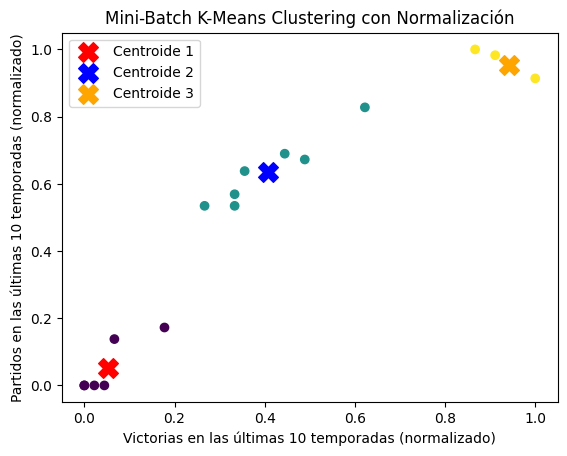

In [42]:
# Definir el número de clústeres
num_clusters = 3 

# Aplicar Mini-Batch K-Means
minibatch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42)
df['etiqueta_clusters'] = minibatch_kmeans.fit_predict(df[columnas_para_normalizar])

# Colores para los centroides
colores = ["red", "blue", "orange"]

# Visualizar los resultados con colores diferentes para cada clúster y cada centroide
plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['etiqueta_clusters'], cmap='viridis')
for i, color in enumerate(colores):
    plt.scatter(minibatch_kmeans.cluster_centers_[i, 0], minibatch_kmeans.cluster_centers_[i, 1], marker='X', s=200, color=color, label=f'Centroide {i+1}')

plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.title('Mini-Batch K-Means Clustering con Normalización')
plt.legend()
plt.show()

Es muy parecido al algoritmo K-Means pero como podemos observar hay un dato que ha asociado a otro centroide, esto se debe a que ha situado los centroides de una manera mas eficiente


La agrupación basada en densidad (Density-based clustering) es una técnica de agrupación que se centra en la densidad local de los puntos de datos en lugar de la distancia entre los puntos. Dos algoritmos populares de agrupación basada en densidad son DBSCAN (Density-Based Spatial Clustering of Applications with Noise) y OPTICS (Ordering Points To Identify the Clustering Structure).

Primero vamos a usar DBSCAN, el cual busca áreas en el espacio de características donde la densidad de puntos es alta, definiendo clusters como regiones densas separadas por regiones más dispersas.

0     0
1     1
2    -1
3     0
4     0
5     1
6     1
7     0
8    -1
9     0
10   -1
11    1
12    0
13    1
14    1
15   -1
Name: cluster, dtype: int64


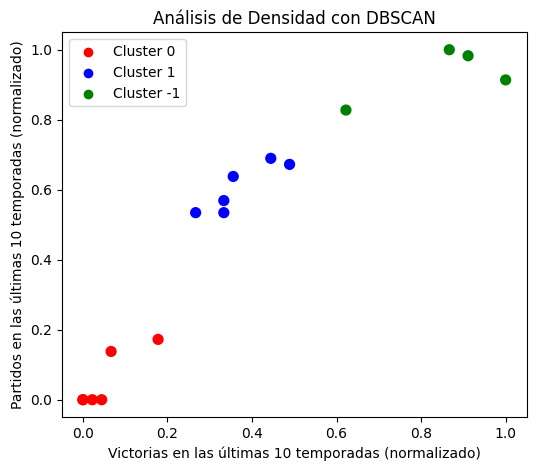

In [68]:
# Crear un conjunto fijo de colores
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['victorias_ult10_temp', 'partidos_ult10_temp']])

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(X_scaled)
print(df['cluster'])
# Visualizar los resultados
plt.figure(figsize=(6, 5))

# Mapa de colores para los clusters
cluster_colors = {label: color for label, color in zip(df['cluster'].unique(), colors)}
colors = df['cluster'].map(cluster_colors)

plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=colors, s=50)
plt.title('Análisis de Densidad con DBSCAN')
plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')

# Añadir leyenda para los clusters
for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')

plt.legend()
plt.show()

Podemos observar a que Cluster va cada equipo

Ahora vamos a usar OPTICS que es una extensión de DBSCAN que crea un gráfico de alcance (reachability plot) para ordenar los puntos en función de su densidad y la distancia a la que se encuentran del punto central. Esto proporciona una visión más detallada de la estructura de clusters.

In [71]:
# Crear un conjunto de datos similar al tuyo
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Agregar las columnas de tu DataFrame
df = pd.DataFrame(X, columns=['victorias_ult10_temp', 'partidos_ult10_temp'])
df['labels_true'] = labels_true

# Normalizar los datos
X_normalized = StandardScaler().fit_transform(df[['victorias_ult10_temp', 'partidos_ult10_temp']])

# Aplicar OPTICS
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
labels = optics.fit_predict(X_normalized)

# Métricas de evaluación
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Algunas métricas para determinar la performance del modelo:')
print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de puntos ruidosos: %d" % n_noise_)
print("Homogeneidad: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completitud: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Ajuste Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Ajuste Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Coeficiente Silhouette: %0.3f" % metrics.silhouette_score(X_normalized, labels))

Algunas métricas para determinar la performance del modelo:
Número estimado de clusters: 3
Número estimado de puntos ruidosos: 56
Homogeneidad: 0.912
Completitud: 0.781
V-measure: 0.841
Ajuste Rand Index: 0.877
Ajuste Mutual Information: 0.841
Coeficiente Silhouette: 0.581


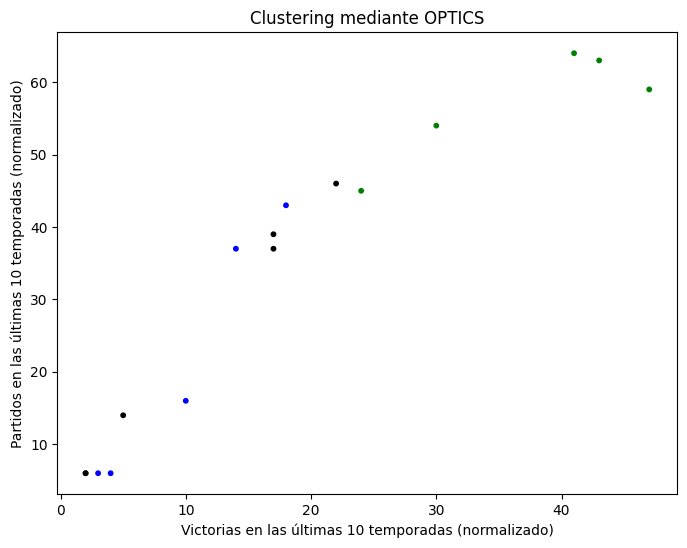

In [91]:
# Visualizar los resultados
plt.figure(figsize=(8, 6))

# Mapa de colores para los clusters
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], color=colors[labels].tolist(), s=10)
plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.title('Clustering mediante OPTICS')

plt.show()

Ahora utilizaremos la clustering basada en la distribución, específicamente usando un modelo de mezcla de gaussianas (GMM, por sus siglas en inglés), es un enfoque que asume que los datos provienen de una mezcla de varias distribuciones gaussianas. Un modelo de mezcla de gaussianas es una combinación ponderada de varias distribuciones gaussianas, cada una caracterizando un cluster en los datos.

C:\Users\usuario\AppData\Local\Temp\ipykernel_27520\905068957.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_clusters)
C:\Users\usuario\AppData\Local\Temp\ipykernel_27520\905068957.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=colors(label), label=f'Cluster {label}')


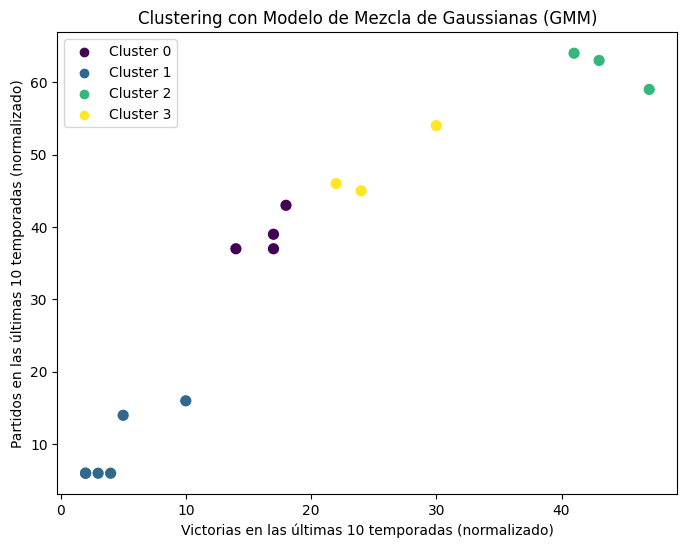

In [100]:
X = df[['victorias_ult10_temp', 'partidos_ult10_temp']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Especificar el número de componentes (clusters)
num_clusters = 4

# Inicializar y ajustar el modelo GMM
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(X_scaled)

# Predecir las etiquetas de cluster
labels = gmm.predict(X_scaled)

# Añadir las etiquetas al DataFrame
df['cluster'] = labels

# Visualizar los resultados
plt.figure(figsize=(8, 6))

# Colores para los clusters
colors = plt.cm.get_cmap('viridis', num_clusters)

plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['cluster'], cmap=colors, s=50)
plt.title('Clustering con Modelo de Mezcla de Gaussianas (GMM)')
plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')

# Mostrar la leyenda para los clusters
for label in range(num_clusters):
    plt.scatter([], [], c=colors(label), label=f'Cluster {label}')

plt.legend()
plt.show()

Ahora haremos uso del Agglomerative Clustering (Agrupamiento Jerárquico), es un método de clustering que construye una jerarquía de clusters. En lugar de asignar directamente los puntos de datos a un número fijo de clusters como en K-Means o DBSCAN, el Hierarchical Clustering crea una estructura de árbol de clusters.

El proceso comienza tratando cada punto de datos como un cluster individual y luego fusionando gradualmente los clusters más cercanos entre sí hasta que todos los puntos de datos estén en un solo cluster o en un número específico de clusters, dependiendo del criterio elegido.

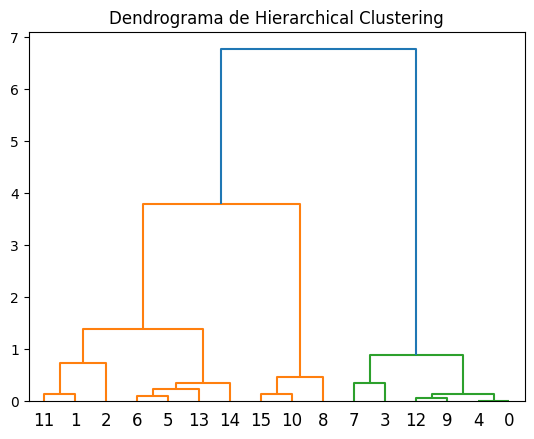

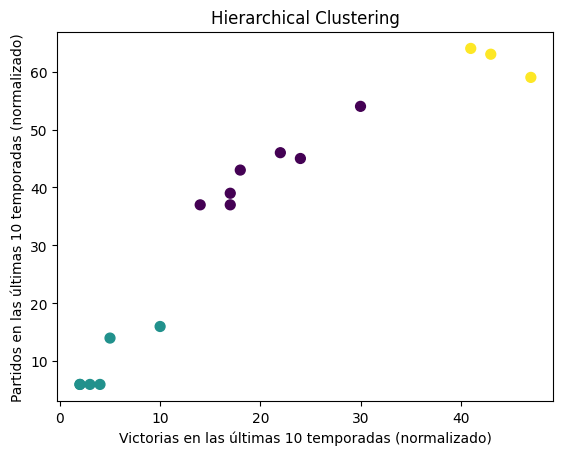

In [102]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['cluster'] = clustering.fit_predict(X_scaled)

# Visualizar dendrograma
linked = linkage(X_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Hierarchical Clustering')
plt.show()

# Visualizar los resultados del clustering
plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.show()


En el Dendograma podemos observar que:
1.La altura en el eje vertical indica la medida en la que dos grupos se combinan. Cuanto mayor sea la altura de la unión, menos similitud hay entre esos grupos.(Hay una gran diferencia de victorias entre el City que tiene muchas comparadas con el Arsenal)